In [43]:
import gcsfs
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import json
%matplotlib inline

In [2]:
fs = gcsfs.GCSFileSystem(project='national-water-model')
# alldays = fs.ls('national-water-model')
# len(alldays)

In [3]:
date = '20190730'
open_ncdfs = []
for i in range(1,19):
    hr = str(i).zfill(3)
    file = fs.open(f'national-water-model/nwm.{date}/short_range/nwm.t00z.short_range.channel_rt.f{hr}.conus.nc', 'rb')
    open_ncdfs.append(file)
mfdset = xr.open_mfdataset(open_ncdfs)

In [4]:
mfdset

<xarray.Dataset>
Dimensions:         (feature_id: 2729077, reference_time: 1, time: 18)
Coordinates:
  * reference_time  (reference_time) datetime64[ns] 2019-07-30
  * feature_id      (feature_id) int32 101 179 181 ... 1180001803 1180001804
  * time            (time) datetime64[ns] 2019-07-30T01:00:00 ... 2019-07-30T18:00:00
Data variables:
    crs             (time) |S1 b'' b'' b'' b'' b'' b'' ... b'' b'' b'' b'' b''
    streamflow      (time, feature_id) float64 dask.array<shape=(18, 2729077), chunksize=(1, 2729077)>
    nudge           (time, feature_id) float64 dask.array<shape=(18, 2729077), chunksize=(1, 2729077)>
    velocity        (time, feature_id) float64 dask.array<shape=(18, 2729077), chunksize=(1, 2729077)>
    qSfcLatRunoff   (time, feature_id) float64 dask.array<shape=(18, 2729077), chunksize=(1, 2729077)>
    qBucket         (time, feature_id) float64 dask.array<shape=(18, 2729077), chunksize=(1, 2729077)>
    qBtmVertRunoff  (time, feature_id) float64 dask.array<shape

In [8]:
comid = 4512772
output_arr = mfdset.sel(feature_id=comid)['streamflow'].values

In [41]:
# build json output
d = {'COMID':comid, 'streamflow': {}}
for idx, val in enumerate(output_arr):
    d['streamflow'][idx+1] = val

# Is this the desired format?

In [46]:
print(json.dumps(d, indent=4))

{
    "COMID": 4512772,
    "streamflow": {
        "1": 154.149996554479,
        "2": 163.80999633856118,
        "3": 171.6599961631,
        "4": 177.9199960231781,
        "5": 182.25999592617154,
        "6": 184.9199958667159,
        "7": 186.27999583631754,
        "8": 186.73999582603574,
        "9": 186.59999582916498,
        "10": 186.08999584056437,
        "11": 185.35999585688114,
        "12": 184.48999587632716,
        "13": 183.55999589711428,
        "14": 182.59999591857195,
        "15": 181.62999594025314,
        "16": 180.65999596193433,
        "17": 179.70999598316848,
        "18": 178.76999600417912
    }
}


In [11]:
# cms_to_cfs_factor = 35.31467
# cfsout = output_arr*cms_to_cfs_factor

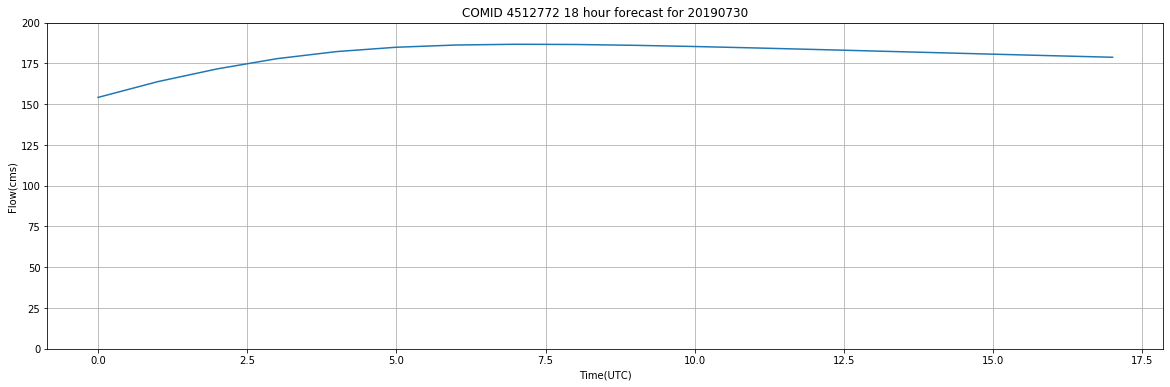

In [49]:
fig, ax = plt.subplots(figsize=(20, 6))
ax.grid(True, which="both")
ax.plot(output_arr)
ax.set_ylabel('Flow(cms)')
ax.set_xlabel('Time(UTC)')

ax.set_title(f'COMID {comid} 18 hour forecast for {date}')
ax.set_autoscaley_on(False)
ax.set_ylim([0,200])

plt.show()

# This is the Hydroshare NWM Forecast Viewer we are trying to mimic:
![COMID 4512772 from HydroShare NWM Forecast Viewer](images/hydroshare_forecast_4512772.jpg)

In [48]:
[f.close() for f in open_ncdfs];